In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#sel = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]

# Calculate the date 1 year ago from the last data point in the database
one_yr_before = (dt.date.today() - dt.timedelta(days=730))
one_yr_before1 = one_yr_before.strftime('%Y-%m-%d')
one_yr_before1
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_yr_before1).all()
precipitation

#session.query(*sel).limit(10).all()


[('2017-04-23', 0.03),
 ('2017-04-24', 0.0),
 ('2017-04-25', 0.0),
 ('2017-04-26', 0.0),
 ('2017-04-27', 0.0),
 ('2017-04-28', 0.0),
 ('2017-04-29', 0.12),
 ('2017-04-30', 0.89),
 ('2017-05-01', 0.26),
 ('2017-05-02', 0.0),
 ('2017-05-03', 0.0),
 ('2017-05-04', 0.0),
 ('2017-05-05', 0.0),
 ('2017-05-06', 0.0),
 ('2017-05-07', 0.0),
 ('2017-05-08', 0.0),
 ('2017-05-10', 0.0),
 ('2017-05-11', 0.01),
 ('2017-05-12', 0.0),
 ('2017-05-13', 0.0),
 ('2017-05-14', 0.0),
 ('2017-05-15', 0.05),
 ('2017-05-16', 0.01),
 ('2017-05-17', 0.0),
 ('2017-05-18', 0.01),
 ('2017-05-19', 0.0),
 ('2017-05-20', 0.0),
 ('2017-05-21', 0.0),
 ('2017-05-22', 0.0),
 ('2017-05-23', 0.08),
 ('2017-05-24', 0.13),
 ('2017-05-25', 0.15),
 ('2017-05-27', 0.01),
 ('2017-05-28', 0.02),
 ('2017-05-29', 0.0),
 ('2017-05-30', 0.26),
 ('2017-05-31', 0.02),
 ('2017-06-01', 0.0),
 ('2017-06-02', 0.0),
 ('2017-06-03', 0.02),
 ('2017-06-04', 0.0),
 ('2017-06-05', 0.0),
 ('2017-06-06', 0.0),
 ('2017-06-07', 0.0),
 ('2017-06-08', 

In [14]:

#session.query(*sel).limit(10).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
df_cleanup = df.dropna()
df_cleanup.head()


,date,precipitation
0,2017-04-23,0.03
1,2017-04-24,0.00
2,2017-04-25,0.00
3,2017-04-26,0.00
4,2017-04-27,0.00


In [15]:
# Sort the dataframe by date
df_cleanup.sort_values(by=['date'])
df_cleanup

df_cleanup1 = df_cleanup[(df_cleanup != 0).all(1)]
df_cleanup1.head()
#df_plot=df_cleanup1["precipitation"].group_by('date').mean()
#df_plot

,date,precipitation
0,2017-04-23,0.03
6,2017-04-29,0.12
7,2017-04-30,0.89
8,2017-05-01,0.26
17,2017-05-11,0.01


In [16]:
g1 = df_cleanup1.groupby(['date'], as_index=False)
#df_plot = g1.mean()
df_plot = df_cleanup1
df_plot.set_index('date', inplace=True, )
df_plot.head()


,precipitation
date,
2017-04-23,0.03
2017-04-29,0.12
2017-04-30,0.89
2017-05-01,0.26
2017-05-11,0.01


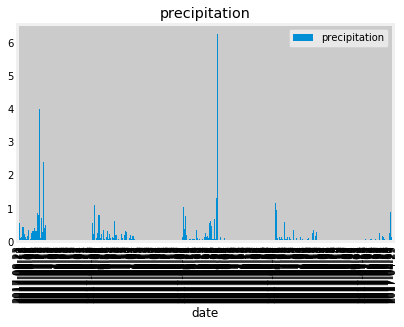

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
df_plot.iloc[::-1].plot.bar(title="precipitation")
#plt.tight_layout()
plt.show()

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,639.000000
mean,0.148232
std,0.402244
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,6.250000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
#sel = [Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
#session.query(*sel).limit(10).all()

no_of_stations = session.query(Measurement.station).distinct().count()
no_of_stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.station, func.min(Measurement.prcp), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    group_by(Measurement.station).all()

[('USC00511918', 0.0, 87.0, 71.61596766043456),
 ('USC00513117', 0.0, 85.0, 72.68918420081211),
 ('USC00514830', 0.0, 85.0, 74.8732970027248),
 ('USC00516128', 0.0, 84.0, 70.91500765696784),
 ('USC00517948', 0.0, 87.0, 74.68440233236151),
 ('USC00518838', 0.0, 83.0, 72.72407045009784),
 ('USC00519281', 0.0, 85.0, 71.66378066378067),
 ('USC00519397', 0.0, 87.0, 74.55323054331865),
 ('USC00519523', 0.0, 85.0, 74.5436493068565)]

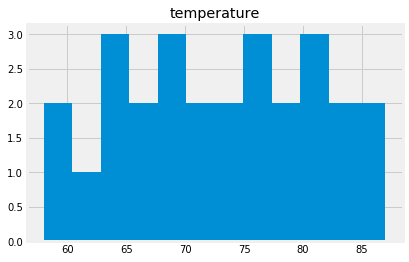

In [97]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id = 'USC00511918'
station_id
one_yr_before = (dt.date.today() - dt.timedelta(days=730))
one_yr_before1 = one_yr_before.strftime('%Y-%m-%d')
one_yr_before1
#temp_data = session.query(func.extract('month', Measurement.date), func.avg(Measurement.tobs), func.count(Measurement.tobs)). \
temp_data = session.query(Measurement.tobs, func.count(Measurement.tobs)). \
     filter(Measurement.date > one_yr_before1). \
    group_by(Measurement.tobs).all()

temp_data

df = pd.DataFrame(temp_data, columns=['temperature', 'frequency'])
df.set_index('frequency', inplace=True )
df
# Use Pandas Plotting with Matplotlib to plot the data
df.hist(bins=12)

plt.show()

![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
one_yr_before = (dt.date.today() - dt.timedelta(days=730))
one_yr_before1 = one_yr_before.strftime('%Y-%m-%d')
one_yr_before1
print(calc_temps(one_yr_before1, dt.date.today() ))

[(58.0, 76.86787204450626, 87.0)]


<BarContainer object of 7 artists>

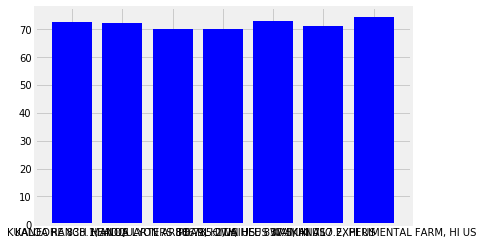

In [128]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
return_data = session.query( Station.name,  func.avg(Measurement.tobs)).\
         select_from(Station).\
        join(Measurement, Station.station  == Measurement.station ).\
        filter(Measurement.date >= '2017-02-28').filter(Measurement.date <= '2017-03-05'). \
        group_by(Station.name).all()

return_data
station,temperature = zip(*return_data)

plt.bar(station,temperature, color='blue', align="center")
plt.show()


In [131]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

return_data = session.query( Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,  func.sum(Measurement.prcp)).\
         select_from(Station).\
        join(Measurement, Station.station  == Measurement.station ).\
        filter(Measurement.date >= '2017-02-28').filter(Measurement.date <= '2017-03-05'). \
        group_by(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

return_data

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.45),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.1600000000000001),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  4.07),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2.98),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  4.720000000000001),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  2.7399999999999998),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.32)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
